In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
infile = open('/content/drive/MyDrive/x_file','rb')
X = pickle.load(infile)
infile.close()

In [ ]:
img_size = 224
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs=25)

Epoch 1/25
202/202 [==============================] - 762s 4s/step - loss: 1.5336 - accuracy: 0.4048
Epoch 2/25
202/202 [==============================] - 756s 4s/step - loss: 1.3133 - accuracy: 0.5013
Epoch 3/25
202/202 [==============================] - 760s 4s/step - loss: 1.2039 - accuracy: 0.5490
Epoch 4/25
202/202 [==============================] - 761s 4s/step - loss: 1.0778 - accuracy: 0.6011
Epoch 5/25
202/202 [==============================] - 758s 4s/step - loss: 1.0207 - accuracy: 0.6135
Epoch 6/25
202/202 [==============================] - 764s 4s/step - loss: 0.9200 - accuracy: 0.6600
Epoch 7/25
202/202 [==============================] - 766s 4s/step - loss: 0.8412 - accuracy: 0.6901
Epoch 8/25
202/202 [==============================] - 764s 4s/step - loss: 0.7611 - accuracy: 0.7158
Epoch 9/25
202/202 [==============================] - 762s 4s/step - loss: 0.7122 - accuracy: 0.7476
Epoch 10/25
202/202 [==============================] - 764s 4s/step - loss: 0.6300 - accura

In [ ]:
new_model.save('Final_model_9507.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
new_model.save('/content/drive/MyDrive/transfer_model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
frame = cv2.imread('/content/drive/MyDrive/sad3.jpg')

In [ ]:
frame.shape

(183, 275, 3)

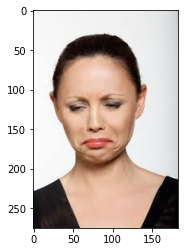

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(223, 226)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print("face not detected")
  else:
    for (ex, ey, ew, eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex:ex + ew]

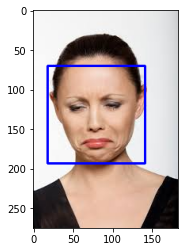

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

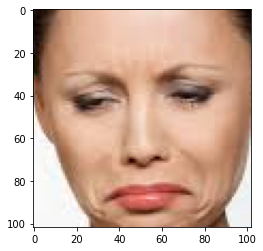

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)


In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions[0]

array([1.0032267e-03, 1.2046409e-04, 1.2608043e-04, 8.8193113e-01,
       9.1677898e-04, 5.8393787e-05, 1.1584396e-01], dtype=float32)

In [ ]:
np.argmax(Predictions)

5